### Step 1: Load the Data

In [1]:
import pandas as pd
# Specify the file path
file_path = r"Dataset_Public.xlsx"

# Load the Excel file
df = pd.read_excel(file_path, engine='openpyxl')

### Step 2: Explore the Dataset:

#### Checking for missing values:

In [2]:
print(df.isnull().sum())

Claim Description    227
Coverage Code          0
Accident Source        0
dtype: int64


#### Inspecting class distributions of "Coverage Code" and "Accident Source":

In [3]:
print(df['Coverage Code'].value_counts())
print(df['Accident Source'].value_counts())

AD    50875
GB    33444
GD    26983
AP    23342
AB    14199
AL    10467
PA     8965
PB     5582
RB     5253
NS     2352
AU     1584
PM     1449
EL      906
AN      848
PL      739
GK      678
RC      656
PI      526
GO      403
AM      379
LL      282
DC      265
GL      250
EP      211
IK      184
OM      148
EO      143
PP      125
TE      124
IM       94
BM       74
BL       39
FB       33
CM       30
RF       17
OI       14
BR        8
RQ        6
EB        4
FF        3
LS        3
EI        2
PC        1
Name: Coverage Code, dtype: int64
Alleged Negligent Act            21284
Sideswipe or lane change         19220
Struck vehicle in rear           10676
Not Otherwise Classified          8359
Struck animal or object           8195
                                 ...  
Aircraft                            17
VEHICLE                             16
Insured Lost Control                16
Natural Hazard-Vegetation           16
Boiler, pressure vessel, etc.       16
Name: Accident Source

#### Exploring data types and basic statistics:

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191690 entries, 0 to 191689
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Claim Description  191463 non-null  object
 1   Coverage Code      191690 non-null  object
 2   Accident Source    191690 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB
None
                                        Claim Description Coverage Code  \
count                                              191463        191690   
unique                                             163990            43   
top     CLAIMANT DROVE OVER POTHOLE CAUSING VEHICLE DA...            AD   
freq                                                 1057         50875   

              Accident Source  
count                  191690  
unique                    312  
top     Alleged Negligent Act  
freq                    21284  


#### Handle Missing Values

#### Check the Missing Rows:

In [5]:
print(df[df['Claim Description'].isnull()])

       Claim Description Coverage Code                         Accident Source
576                  NaN            AD                  Struck vehicle in rear
1342                 NaN            AP                  Struck vehicle in rear
1449                 NaN            AB                  Struck vehicle in rear
2249                 NaN            AD  Jacknife, rollover, overturned vehicle
3245                 NaN            RB                Not Otherwise Classified
...                  ...           ...                                     ...
189690               NaN            AL  Accidental disposal of property/object
189713               NaN            GD                   Alleged Negligent Act
190275               NaN            AB                Sideswipe or lane change
190337               NaN            AB                  Struck vehicle in rear
190483               NaN            AB                  Struck vehicle in rear

[227 rows x 3 columns]


#### Remove Missing Values:

In [6]:
df = df.dropna(subset=['Claim Description'])

In [7]:
print(df.isnull().sum())

Claim Description    0
Coverage Code        0
Accident Source      0
dtype: int64


#### Analyzing Class Imbalance

#### From the outputs:
"Coverage Code": Severe imbalance (e.g., "AD" has 50,875 samples, while "PC" has only 1).
"Accident Source": Long-tail distribution with significant imbalance (e.g., "Alleged Negligent Act" has 21,284 samples, while many classes have <20 samples).

#### Let's Plot Class Distributions: Visualize the imbalance for both target variables:

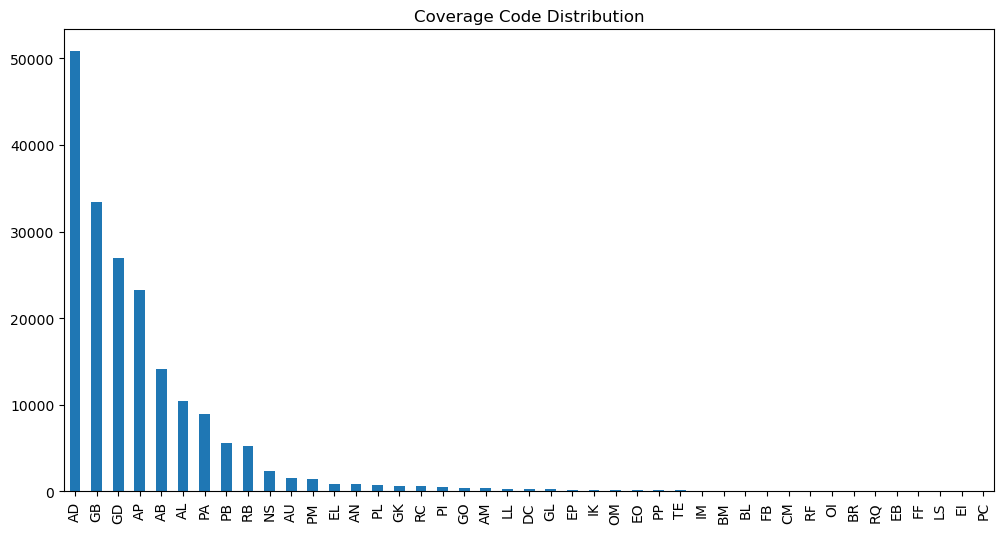

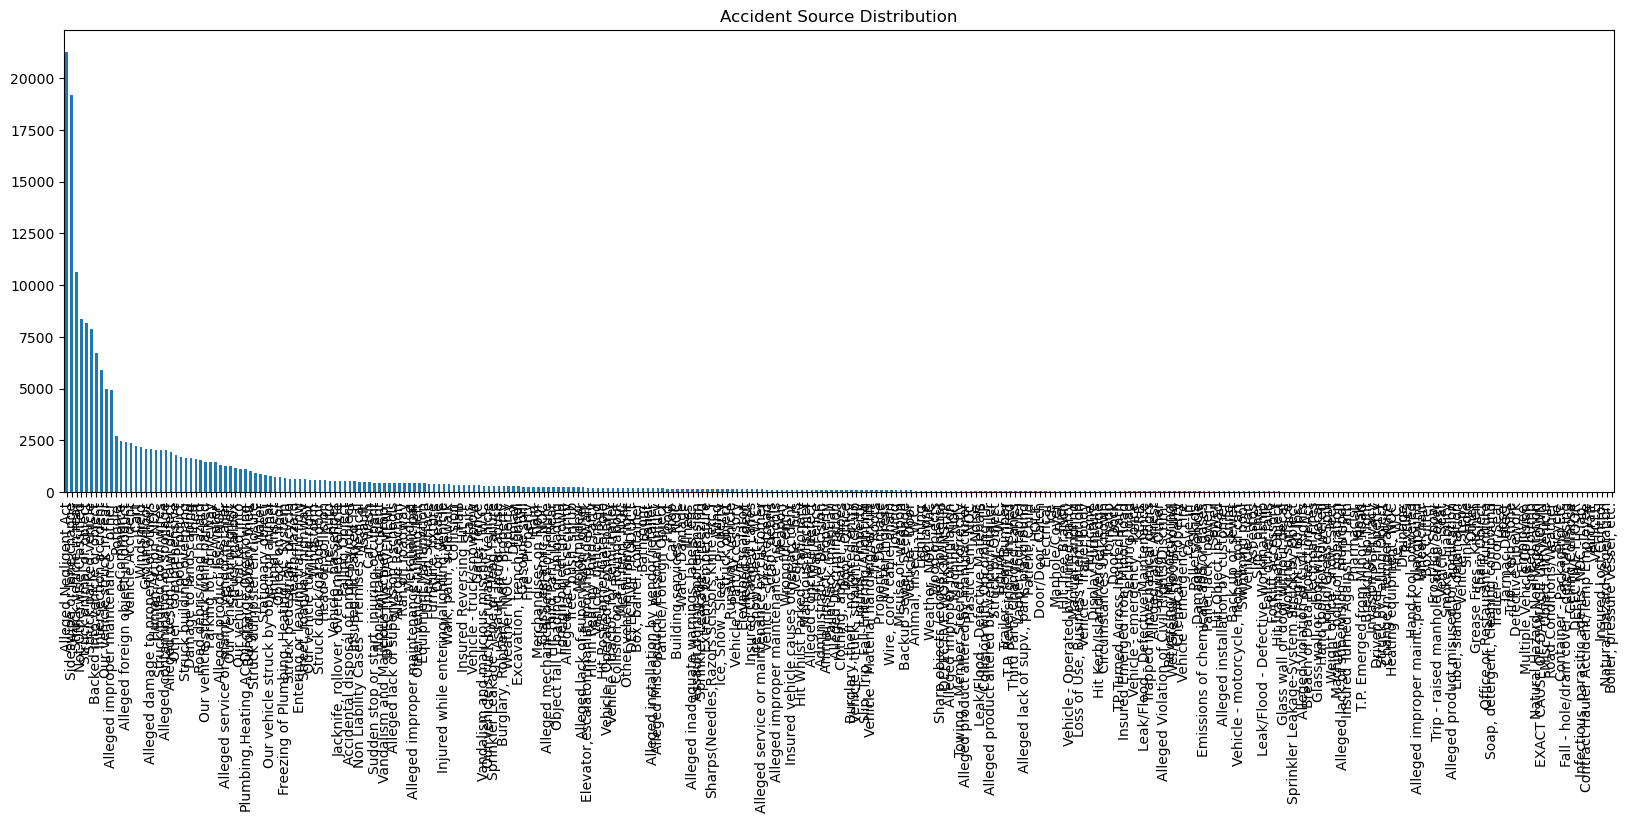

In [8]:
import matplotlib.pyplot as plt

# Coverage Code distribution
df['Coverage Code'].value_counts().plot(kind='bar', figsize=(12, 6), title='Coverage Code Distribution')
plt.show()

# Accident Source distribution
df['Accident Source'].value_counts().plot(kind='bar', figsize=(20, 6), title='Accident Source Distribution')
plt.show()


#### Balance Classes Later:

#### For now, we havce noted the imbalance. We'll address it using techniques like SMOTE, class weighting, or oversampling during model training.

### Step 3: Text Preprocessing

#### Step 3.1 Basic Cleaning: Removing special characters, numbers, and extra spaces:

In [9]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # Remove non-alphabetical characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['Claim Description'] = df['Claim Description'].apply(clean_text)


#### Step 3.2 Tokenization: Break the text into individual words (tokens):

In [10]:
import nltk
from nltk.tokenize import word_tokenize
df['Claim Tokens'] = df['Claim Description'].apply(word_tokenize)


#### Step 3.3 Stopword Removal: Remove common words like "the," "is," etc., to reduce noise:

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['Claim Tokens'] = df['Claim Tokens'].apply(lambda x: [word for word in x if word not in stop_words])


#### Step 3.4 Lemmatization: Normalize words to their root forms:

In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df['Claim Tokens'] = df['Claim Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


#### Verifing Results: Inspecting the processed text:

In [13]:
print(df['Claim Description'].head())

0    THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW...
1    CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN E...
2    IV PASSENGER SUSTAINED INJURIES OV AND IV COLL...
3    CLAIMANT ALLEGES SHE WAS BURNED UNKNOWN DEGREE...
4    THE IV WAS MERGING INTO A CONSTRUCTION ZONE WH...
Name: Claim Description, dtype: object


### Step 4: Feature Extraction (Text Vectorization)

#### Transforming the cleaned text into numerical features for machine learning.

#### Step 4.1 Apply TF-IDF Vectorizer:

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer with a max of 5000 features
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the Claim Description column
X = tfidf.fit_transform(df['Claim Description']).toarray()

# Check the shape of the resulting matrix
print(X.shape)


(191463, 5000)


#### Step 4.3 Inspect the Features:

In [15]:
# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Print the first 10 words
print(feature_names[:10])


['aa' 'aaa' 'aar' 'aaron' 'ab' 'abandoned' 'abdomen' 'abdominal' 'able'
 'aboard']


#### Step 4.3 Save Target Variables:

In [16]:
y_coverage = df['Coverage Code']  # Target for Coverage Code
y_accident = df['Accident Source']  # Target for Accident Source

# Verify the shape of the target
print(y_coverage.shape, y_accident.shape)


(191463,) (191463,)


### Step 5: Addressing Class Imbalance
The target variables (Coverage Code and Accident Source) are imbalanced, so we need to address this issue to improve model performance.


#### Step 5.1 Check Class Imbalance in Target Variables

####  Handle Class Imbalance for Coverage Code

In [23]:
# from imblearn.over_sampling import SMOTE

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Apply SMOTE to 'Coverage Code'
# X_coverage_balanced, y_coverage_balanced = smote.fit_resample(X, y_coverage)

# # Check the new class distribution
# from collections import Counter
# print("Original 'Coverage Code' distribution:", Counter(y_coverage))
# print("Balanced 'Coverage Code' distribution:", Counter(y_coverage_balanced))


####  Handle Class Imbalance for Accident Source

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Apply SMOTE to 'Accident Source'
# X_accident_balanced, y_accident_balanced = smote.fit_resample(X, y_accident)

# # Check the new class distribution
# print("Original 'Accident Source' distribution:", Counter(y_accident))
# print("Balanced 'Accident Source' distribution:", Counter(y_accident_balanced))


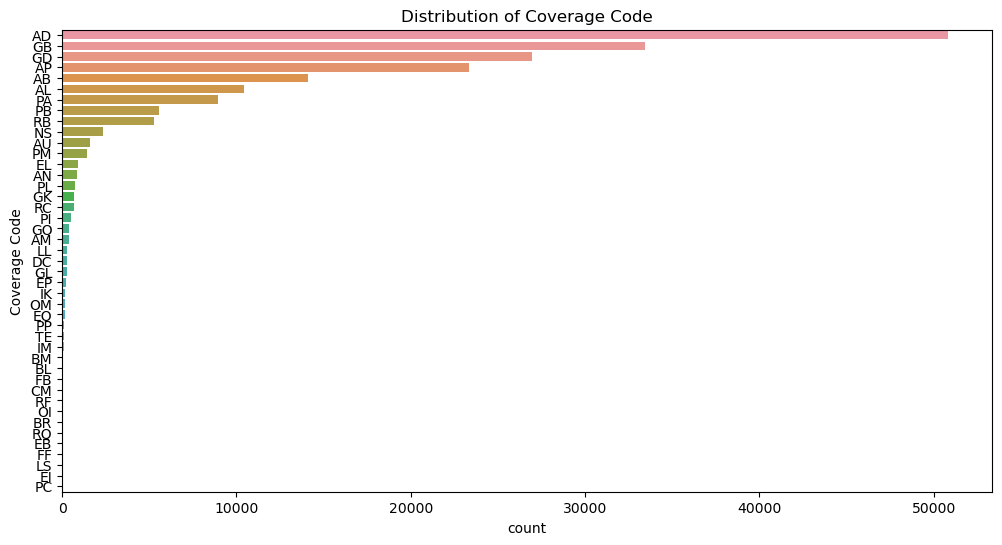

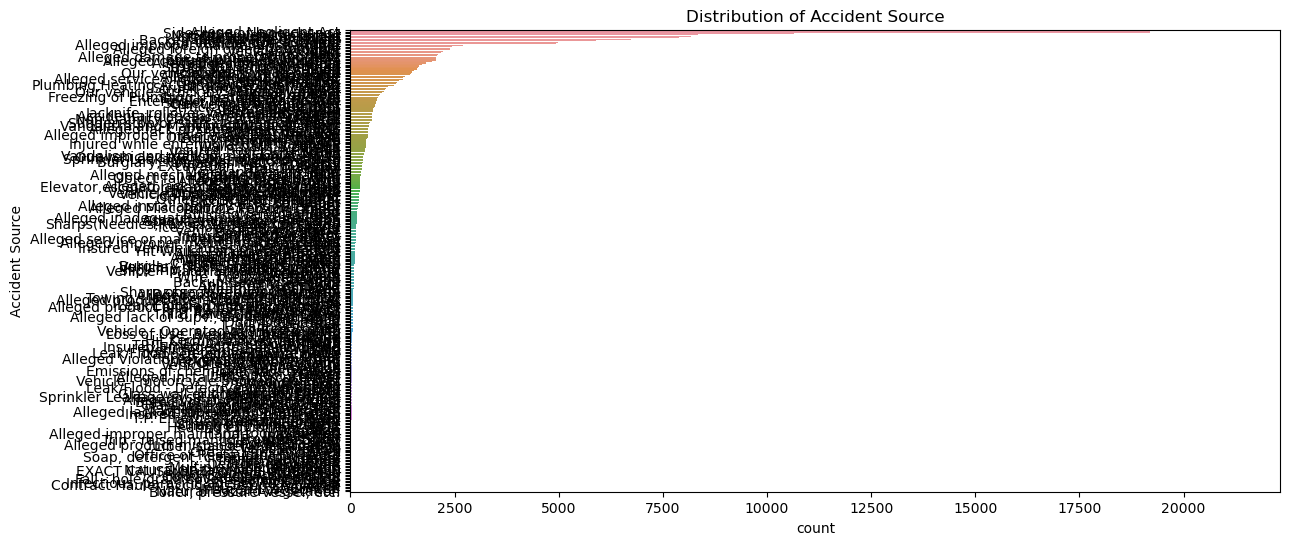

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Coverage Code Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Coverage Code'], order=df['Coverage Code'].value_counts().index)
plt.title('Distribution of Coverage Code')
plt.show()

# Accident Source Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Accident Source'], order=df['Accident Source'].value_counts().index)
plt.title('Distribution of Accident Source')
plt.show()


#### Step 5.2: Analyzing Class Imbalance Numerically

In [18]:
# Coverage Code Class Imbalance
coverage_code_counts = df['Coverage Code'].value_counts()
coverage_code_ratio = coverage_code_counts / len(df)
print("Coverage Code Distribution:\n", coverage_code_counts)
print("\nCoverage Code Imbalance Ratio:\n", coverage_code_ratio)

# Accident Source Class Imbalance
accident_source_counts = df['Accident Source'].value_counts()
accident_source_ratio = accident_source_counts / len(df)
print("\nAccident Source Distribution:\n", accident_source_counts)
print("\nAccident Source Imbalance Ratio:\n", accident_source_ratio)


Coverage Code Distribution:
 AD    50808
GB    33424
GD    26974
AP    23314
AB    14131
AL    10452
PA     8965
PB     5578
RB     5251
NS     2352
AU     1582
PM     1449
EL      906
AN      841
PL      739
GK      678
RC      653
PI      526
GO      403
AM      379
LL      282
DC      265
GL      250
EP      211
IK      184
OM      148
EO      143
PP      125
TE      123
IM       94
BM       73
BL       39
FB       33
CM       30
RF       17
OI       14
BR        8
RQ        6
EB        4
FF        3
LS        3
EI        2
PC        1
Name: Coverage Code, dtype: int64

Coverage Code Imbalance Ratio:
 AD    0.265367
GB    0.174572
GD    0.140884
AP    0.121768
AB    0.073805
AL    0.054590
PA    0.046824
PB    0.029134
RB    0.027426
NS    0.012284
AU    0.008263
PM    0.007568
EL    0.004732
AN    0.004392
PL    0.003860
GK    0.003541
RC    0.003411
PI    0.002747
GO    0.002105
AM    0.001979
LL    0.001473
DC    0.001384
GL    0.001306
EP    0.001102
IK    0.000961
OM    0.00077

#### Step 5.3: Applying Label Encoder on Coverage Code and Accident Source

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder_coverage = LabelEncoder()
label_encoder_accident = LabelEncoder()

# Apply LabelEncoder to Coverage Code and Accident Source
df['Coverage Code'] = label_encoder_coverage.fit_transform(df['Coverage Code'])
df['Accident Source'] = label_encoder_accident.fit_transform(df['Accident Source'])

# Check the first few rows to verify the encoding
print(df[['Coverage Code', 'Accident Source']].head())


   Coverage Code  Accident Source
0              4              247
1             19               90
2              0              225
3             31              104
4              1              248


In [20]:
df['Coverage Code']

0          4
1         19
2          0
3         31
4          1
          ..
191685    19
191686     0
191687     1
191688    36
191689     0
Name: Coverage Code, Length: 191463, dtype: int32

In [21]:
print(df['Claim Tokens'].dtype)

object


#### Performing Tf-idf

In [22]:
# Ensure that both 'Claim Description' and 'Claim Tokens' are strings
df['Claim Description'] = df['Claim Description'].astype(str)
df['Claim Tokens'] = df['Claim Tokens'].astype(str)

# Initialize the TF-IDF Vectorizer for 'Claim Description' and 'Claim Tokens'
vectorizer_desc = TfidfVectorizer(max_features=500)
vectorizer_tokens = TfidfVectorizer(max_features=500)

# Transform the text columns into numeric features
X_desc = vectorizer_desc.fit_transform(df['Claim Description']).toarray()
X_tokens = vectorizer_tokens.fit_transform(df['Claim Tokens']).toarray()

# Combine the transformed features into a single feature set
import numpy as np
X_combined = np.hstack((X_desc, X_tokens))

# Convert the result to a DataFrame to ensure consistency
X_combined_df = pd.DataFrame(X_combined)

# Check the shape of the new feature set
print(X_combined_df.shape)


(191463, 1000)


### Step 6: Applying Train-Test Split


In [23]:
from sklearn.model_selection import train_test_split

# Select the features (X) and target variables (y)
X = X_combined_df  # The transformed features
y_coverage = df['Coverage Code']  # Target variable for Coverage Code
y_accident = df['Accident Source']  # Target variable for Accident Source

# Split the data for Coverage Code
X_train_cov, X_test_cov, y_train_cov, y_test_cov = train_test_split(X, y_coverage, test_size=0.2, random_state=42)

# Split the data for Accident Source
X_train_acc, X_test_acc, y_train_acc, y_test_acc = train_test_split(X, y_accident, test_size=0.2, random_state=42)

# Verify the split sizes
print(f"Training set size for Coverage Code: {X_train_cov.shape}, Test set size: {X_test_cov.shape}")
print(f"Training set size for Accident Source: {X_train_acc.shape}, Test set size: {X_test_acc.shape}")


Training set size for Coverage Code: (153170, 1000), Test set size: (38293, 1000)
Training set size for Accident Source: (153170, 1000), Test set size: (38293, 1000)


### Step 7: Model Training
let's start by training a Random Forest Classifier on both the Coverage Code and Accident Source targets.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_coverage = RandomForestClassifier(random_state=42)
rf_accident = RandomForestClassifier(random_state=42)

# Train the model for Coverage Code
rf_coverage.fit(X_train_cov, y_train_cov)

# Train the model for Accident Source
rf_accident.fit(X_train_acc, y_train_acc)

# Predictions for Coverage Code
y_pred_cov = rf_coverage.predict(X_test_cov)

# Predictions for Accident Source
y_pred_acc = rf_accident.predict(X_test_acc)

# Evaluate the model for Coverage Code
print("Coverage Code Classification Report:\n", classification_report(y_test_cov, y_pred_cov))

# Evaluate the model for Accident Source
print("Accident Source Classification Report:\n", classification_report(y_test_acc, y_pred_acc))


Coverage Code Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.25      0.32      2813
           1       0.59      0.79      0.68     10174
           2       0.92      0.91      0.91      2084
           3       0.21      0.07      0.11        84
           4       0.20      0.10      0.13       153
           5       0.59      0.36      0.45      4661
           6       0.52      0.37      0.43       311
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         5
          11       0.56      0.10      0.17        51
          12       0.00      0.00      0.00         1
          14       0.82      0.13      0.23       174
          15       0.73      0.28      0.40        29
          16       0.59      0.20      0.30        50
          17       1.00      0.14      0.25

c:\Users\sarve\anaconda3\envs\pointnet_model2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sarve\anaconda3\envs\pointnet_model2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sarve\anaconda3\envs\pointnet_model2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Analyze Class Distribution for Imbalance

In [31]:
# # Check class distribution for Coverage Code
# print("Coverage Code Distribution:\n", y_coverage.value_counts(normalize=True))

# # Check class distribution for Accident Source
# print("Accident Source Distribution:\n", y_accident.value_counts(normalize=True))


#### Step 7.2: Address Class Imbalance

#### Training the models with balanced class weights:

In [24]:
# Initialize the Random Forest classifier with class weights and reduced parameters
rf_coverage_balanced = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=50, max_depth=10)

rf_accident_balanced = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=50, max_depth=10)

# Train the model for Coverage Code
rf_coverage_balanced.fit(X_train_cov, y_train_cov)

# Train the model for Accident Source
rf_accident_balanced.fit(X_train_acc, y_train_acc)

# Predictions for Coverage Code
y_pred_cov_balanced = rf_coverage_balanced.predict(X_test_cov)

# Predictions for Accident Source
y_pred_acc_balanced = rf_accident_balanced.predict(X_test_acc)

# Evaluate the model for Coverage Code
print("Coverage Code Classification Report (Balanced):\n", classification_report(y_test_cov, y_pred_cov_balanced))

# Evaluate the model for Accident Source
print("Accident Source Classification Report (Balanced):\n", classification_report(y_test_acc, y_pred_acc_balanced))


Coverage Code Classification Report (Balanced):
               precision    recall  f1-score   support

           0       0.38      0.09      0.15      2813
           1       0.70      0.18      0.29     10174
           2       0.61      0.93      0.74      2084
           3       0.01      0.48      0.03        84
           4       0.03      0.10      0.04       153
           5       0.42      0.15      0.22      4661
           6       0.19      0.54      0.28       311
           7       0.00      0.25      0.01         4
           8       0.02      0.27      0.04        11
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         5
          11       0.01      0.55      0.02        51
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.09      0.28      0.13       174
          15       0.04      0.38      0.07        29
          16       0.05      0.2

c:\Users\sarve\anaconda3\envs\pointnet_model2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sarve\anaconda3\envs\pointnet_model2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sarve\anaconda3\envs\pointnet_model2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Step 8: Performing hyperparameter tuning with RandomizedSearchCV

##### RandomizedSearchCV for Coverage Code

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search_cov = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV for Coverage Code
random_search_cov.fit(X_train_cov, y_train_cov)

# Best parameters and best score for Coverage Code
print("Best parameters for Coverage Code:", random_search_cov.best_params_)
print("Best score for Coverage Code:", random_search_cov.best_score_)

# Now fit the best model to the training data
best_rf_cov = random_search_cov.best_estimator_

# Evaluate the best model on the test set for Coverage Code
y_pred_cov_best = best_rf_cov.predict(X_test_cov)
print("Coverage Code Classification Report (Tuned):\n", classification_report(y_test_cov, y_pred_cov_best))


c:\Users\sarve\anaconda3\envs\pointnet_model2\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


Best parameters for Coverage Code: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': None}
Best score for Coverage Code: 0.6528301971318492
Coverage Code Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.44      0.25      0.32      2813
           1       0.59      0.79      0.68     10174
           2       0.92      0.91      0.91      2084
           3       0.20      0.07      0.11        84
           4       0.21      0.09      0.13       153
           5       0.59      0.37      0.45      4661
           6       0.54      0.37      0.44       311
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         5
          11       0.56      0.10      0.17        51
          12       0.00      0.00      0.00         1
    

c:\Users\sarve\anaconda3\envs\pointnet_model2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sarve\anaconda3\envs\pointnet_model2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sarve\anaconda3\envs\pointnet_model2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### RandomizedSearchCV for Accident Source

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Initialize Random Forest classifier for Accident Source
rf_acc = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV for Accident Source
random_search_acc = RandomizedSearchCV(rf_acc, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV for Accident Source
random_search_acc.fit(X_train_acc, y_train_acc)

# Best parameters and best score for Accident Source
print("Best parameters for Accident Source:", random_search_acc.best_params_)
print("Best score for Accident Source:", random_search_acc.best_score_)

# Now fit the best model to the training data for Accident Source
best_rf_acc = random_search_acc.best_estimator_

# Evaluate the best model on the test set for Accident Source
y_pred_acc_best = best_rf_acc.predict(X_test_acc)
print("Accident Source Classification Report (Tuned):\n", classification_report(y_test_acc, y_pred_acc_best))


### Step 9: Trying XGBoost Model for furthur exploration

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


#### Training an XGBoost Model for Coverage Code

#####  Ensuring Uniform Data Type in the Target Variable

In [34]:
# Convert all target labels to strings
y_train_cov = y_train_cov.astype(str)
y_test_cov = y_test_cov.astype(str)

# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder_cov = LabelEncoder()
y_train_cov_encoded = label_encoder_cov.fit_transform(y_train_cov)
y_test_cov_encoded = label_encoder_cov.transform(y_test_cov)

# Print unique classes to confirm
print("Encoded classes for Coverage Code:", label_encoder_cov.classes_)


Encoded classes for Coverage Code: ['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '34' '35' '36' '37'
 '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9' 'Other']


In [ ]:
# Initialize XGBoost classifier
xgb_coverage = XGBClassifier(
    random_state=42,
    objective='multi:softmax',
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1
)

# Train the model
xgb_coverage.fit(X_train_cov, y_train_cov_encoded)

# Make predictions
y_pred_cov_xgb = xgb_coverage.predict(X_test_cov)

# Decode predictions back to original labels
y_pred_cov_decoded = label_encoder_cov.inverse_transform(y_pred_cov_xgb)

# Evaluate the model
from sklearn.metrics import classification_report
print("Coverage Code Classification Report (XGBoost):\n", classification_report(y_test_cov, y_pred_cov_decoded))


##### Converting y_train_acc and y_test_acc to Strings

In [ ]:
# Converting Accident Source target labels to strings
y_train_acc = y_train_acc.astype(str)
y_test_acc = y_test_acc.astype(str)


##### Applying Label Encoding for Accident Source

In [ ]:
# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder_acc = LabelEncoder()
y_train_acc_encoded = label_encoder_acc.fit_transform(y_train_acc)
y_test_acc_encoded = label_encoder_acc.transform(y_test_acc)

# Print unique classes to confirm
print("Encoded classes for Accident Source:", label_encoder_acc.classes_)


##### Training and Evaluating the XGBoost Model for Accident Source

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize XGBoost classifier
xgb_accident = XGBClassifier(
    random_state=42,
    objective='multi:softmax',
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1
)

# Train the model
xgb_accident.fit(X_train_acc, y_train_acc_encoded)

# Make predictions
y_pred_acc_xgb = xgb_accident.predict(X_test_acc)

# Decode predictions back to original labels
y_pred_acc_decoded = label_encoder_acc.inverse_transform(y_pred_acc_xgb)

# Evaluate the model
print("Accident Source Classification Report (XGBoost):\n", classification_report(y_test_acc, y_pred_acc_decoded))


### Step 10: Saving the best performing model

In [ ]:
import pickle

# Save the "Coverage Code" model to the Assessment folder
model_path_cov = r"best_rf_coverage_model.pkl"
with open(model_path_cov, 'wb') as file:
    pickle.dump(best_rf_cov, file)
print(f"Coverage Code model saved at: {model_path_cov}")

# If you also trained the "Accident Source" model, save it as well
model_path_acc = r"best_rf_accident_model.pkl"
with open(model_path_acc, 'wb') as file:
    pickle.dump(best_rf_acc, file)
print(f"Accident Source model saved at: {model_path_acc}")


Coverage Code model saved at: C:\Users\sarve\Downloads\Assessment\best_rf_coverage_model.pkl
Accident Source model saved at: C:\Users\sarve\Downloads\Assessment\best_rf_accident_model.pkl
